# Understanding Logistic Regression Tables

Using the same code as in the previous exercise, try to interpret the summary table.

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [4]:
df=pd.read_csv('datasets/Bank_data.csv',on_bad_lines='skip')

In [5]:
df.sample(5)

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
228,228,1.244,0.0,1.0,0.0,0.0,1340.0,yes
39,39,1.266,0.0,1.0,0.0,0.0,436.0,no
150,150,4.858,0.0,1.0,0.0,0.0,951.0,no
364,364,4.120,0.0,0.0,0.0,0.0,424.0,yes
428,428,1.041,0.0,0.0,0.0,0.0,344.0,yes


In [6]:
m={'yes':1,'no':0}

In [7]:
df['y']=df['y'].map(m)

In [8]:
df.sample(5)

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
181,181,1.327,0.0,1.0,0.0,0.0,141.0,0
10,10,1.365,0.0,0.0,1.0,1.0,374.0,0
53,53,4.957,0.0,0.0,0.0,0.0,154.0,0
279,279,1.344,0.0,1.0,0.0,0.0,201.0,0
403,403,1.262,0.0,0.0,2.0,0.0,712.0,1


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [9]:
x1=df['duration']
y=df['y']

### Simple Logistic Regression

Run the regression.

In [10]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


### Interpretation

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


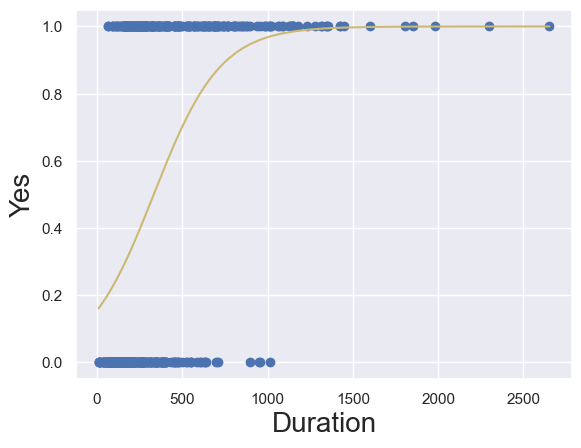

In [15]:
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))

f_sorted=np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted=np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Yes',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [16]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.2121
Time:                        15:46:05   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""